<a href="https://colab.research.google.com/github/yj-shin/yj-shin.github.io/blob/master/%ED%86%B5%ED%95%A9%EB%AA%A8%EB%8D%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load relevant libraries
import numpy as np
import pandas as pd

import tensorflow as tf
import keras
import tensorflow.keras as keras

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
import argparse
import locale
import os

In [ ]:
from keras.layers import Conv1D, Dense, Flatten, MaxPool1D, Input, concatenate
from keras.regularizers import l2

def create_dnn(dim):
	# define our DNN network
    model = Sequential()


    model.add(Dense(16, input_dim=dim, activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(16,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(16,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(16,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(16,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(16,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(32,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(32,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(32,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(32,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(32,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(64,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(64,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(64,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(64,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(64,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(64,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(32,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(32,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(16,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(16,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(16,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#     model.add(Dense(16,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(8,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(8,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(8,  activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(4, activation="relu",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(1, activation="linear",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    return model

def create_lstm(time_stemp, dim): #(timestep, feature)
    model = Sequential() 
    model.add(LSTM(5, input_shape=(time_stemp, dim))) # (timestep, feature) 
    model.add(Dense(1))
    return model

# def create_lstm(dim):
#     model = Sequential([   
#         LSTM(units=dim,
#             return_sequences=True,
#             input_shape=(train_X_t.shape[1],
#                           train_X_t.shape[2])),
#         # LSTM(units=dim),
#         Dense(4)
#     ])
#     return model

In [ ]:
# filepath = '/content/drive/MyDrive/LSTM/'
filename = 'MiningProcess_Flotation_Plant_Database.csv'
cols_renamed = [
    'date',          # Timestamp of measurements, formatted YYYY-MM-DD HH:MM:SS
    'feed_iron',     # %Iron (valuables) in the ore being fed into the flotation cell
    'feed_silica',   # %Silica (gangue) in the ore being fed into the cell
    'starch_flow',   # Amount of starch (reagent) added into the cell, measured in m^3/h
    'amina_flow',    # Amount of amina (reagent) added into the cell, measured in m^3/h
    'pulp_flow',     # Amount of ore pulp fed into the cell, measured in tonnes/hour
    'pulp_ph',       # Acidity/alkalinity of ore pulp on a scale of 0-14
    'pulp_density',  # Amount of ore in the pulp, between 1-3 kg/cm^3
    'air_col1',      # Volume of air injected into the cell, measured in Nm3/h
    'air_col2',
    'air_col3',
    'air_col4',
    'air_col5',
    'air_col6',
    'air_col7',
    'level_col1',    # Froth height in the cell, measured in mm
    'level_col2',
    'level_col3',
    'level_col4',
    'level_col5',
    'level_col6',
    'level_col7',
    'conc_iron',     # Lab measurement: %Iron in the end of flotation process
    'conc_silica']   # Lab measurement: %Silica in the end of flotation process
df = pd.read_csv(
    filename,
    header=0,
    names=cols_renamed,
    parse_dates=['date'],
    infer_datetime_format=True,
    decimal=',')
df.head()

,date,feed_iron,feed_silica,starch_flow,amina_flow,pulp_flow,pulp_ph,pulp_density,air_col1,air_col2,...,air_col7,level_col1,level_col2,level_col3,level_col4,level_col5,level_col6,level_col7,conc_iron,conc_silica
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [ ]:
df.shape

(737453, 24)

In [ ]:
df=df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
# df = df.set_index('date').resample('H').first()
df = df.set_index('date')
df.shape

(737453, 23)

In [ ]:
def create_lstm_data(data,k):
    '''
    input:
        data - the numpy matrix of (n, p+1) shape, where n is the number of rows,
               p+1 is the number of predictors + 1 target column
        k    - the length of the sequence, namely, the number of previous rows 
               (including current) we want to use to predict the target.
    output:
        X_data - the predictors numpy matrix of (n-k, k, p) shape
        y_data - the target numpy array of (n-k, 1) shape
    '''
    data=pd.DataFrame(data).iloc[:,-2:]
    data=np.array(data)
    # initialize zero matrix of (n-k, k, p) shape to store the n-k number
    # of sequences of k-length and zero array of (n-k, 1) to store targets
    X_data = np.zeros([data.shape[0]-k, k, data.shape[1]])
    print(X_data.shape)
    y_data = []
    
    # run loop to slice k-number of previous rows as 1 sequence to predict
    # 1 target and save them to X_data matrix and y_data list
    for i in range(k, data.shape[0]):
        cur_sequence = data[i-k: i, :]
        cur_target = data[i-1, -1]
        
        X_data[i-k,:, :] = cur_sequence.reshape(1, k, X_data.shape[2])
        y_data.append(cur_target)
    
    return X_data, np.asarray(y_data)

# Check output data shapes
print('Predictors matrix shape: ' + str(create_lstm_data(df.values, 10)[0].shape))
print('Target array shape: ' + str(create_lstm_data(df.values, 10)[1].shape))

(737443, 10, 2)
Predictors matrix shape: (737443, 10, 2)
(737443, 10, 2)
Target array shape: (737443,)


In [ ]:
k=10

dnn1=create_dnn(df.shape[1]-1) 
dnn2=create_dnn(df.shape[1]-1) 
dnn3=create_dnn(df.shape[1]-1) 
dnn4=create_dnn(df.shape[1]-1) 
dnn5=create_dnn(df.shape[1]-1) 
lstm1=create_lstm(k,2)
lstm2=create_lstm(k,2)
lstm3=create_lstm(k,2)
lstm4=create_lstm(k,2)
lstm5=create_lstm(k,2)
combinedInput1 = concatenate([dnn1.output, lstm1.output])
combinedInput2 = concatenate([dnn2.output, lstm2.output])
combinedInput3 = concatenate([dnn3.output, lstm3.output])
combinedInput4 = concatenate([dnn4.output, lstm4.output])
combinedInput5 = concatenate([dnn5.output, lstm5.output])
combinedInput=concatenate([combinedInput1,combinedInput2,combinedInput3,combinedInput4,combinedInput5])

x = Dense(8, activation="relu")(combinedInput)
# x = Dense(8, activation="relu")(combinedInput1)
x = Dense(1, activation="linear")(x)

model = Model(inputs=[dnn1.input, lstm1.input, dnn2.input, lstm2.input, dnn3.input, lstm3.input, dnn4.input, lstm4.input, dnn5.input, lstm5.input], outputs=x)
# model = Model(inputs=[dnn1.input, lstm1.input], outputs=x)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
# df = scaler.fit_transform(np.array(df).reshape(-1, df.shape[-1])).reshape(df.shape)
df = np.array(df).reshape(-1, df.shape[-1]).reshape(df.shape)

df_valid = df[int(df.shape[0]*0.8):,:]
df_train = df[:int(df.shape[0]*0.8),:]
df_test = df_valid[int(df_valid.shape[0]*0.5):,:]
df_valid = df_valid[:int(df_valid.shape[0]*0.5),:]

df_train.shape, df_valid.shape, df_test.shape

((589962, 23), (73745, 23), (73746, 23))

In [ ]:
def LSTM_model(X_train, y_train, X_valid, y_valid, k):
    # Define and compile LSTM model
    model = Sequential()
    model.add(LSTM(100, input_shape=(k, X_train.shape[2])))
    model.add(Dense(2, activation='sigmoid'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer=opt, loss='binary_crossentropy',  metrics=['accuracy'])
    # Early stopping and best model checkpoint parameters
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=20)
    mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
    # Train the model 
    history = model.fit(X_train, tf.one_hot(y_train, depth=2),
                        validation_data=(X_valid, tf.one_hot(y_valid, depth=2)),
                        epochs=200, verbose=0, callbacks=[es, mc])

In [ ]:
def create_dnn_data(df,k):
    df=pd.DataFrame(df).shift(-k)
    df=df[:-k]
    print(df.shape)
    X=df.iloc[:,:-1]
    y=df.iloc[:,-1]

    return X,y

In [ ]:
k=10

X_train_dnn,y_train_dnn = create_dnn_data(df_train,k)
X_valid_dnn,y_valid_dnn = create_dnn_data(df_valid,k)
X_test_dnn,y_test_dnn = create_dnn_data(df_test,k)
X_train_LSTM, y_train_LSTM = create_lstm_data(df_train, k)
X_valid_LSTM, y_valid_LSTM = create_lstm_data(df_valid, k)
X_test_LSTM, y_test_LSTM = create_lstm_data(df_test, k)

(589952, 23)
(73735, 23)
(73736, 23)
(589952, 10, 2)
(73735, 10, 2)
(73736, 10, 2)


In [ ]:
model = Model(inputs=[dnn1.input, lstm1.input, dnn2.input, lstm2.input, dnn3.input, lstm3.input, dnn4.input, lstm4.input, dnn5.input, lstm5.input], outputs=x)
# model = Model(inputs=[dnn1.input, lstm1.input], outputs=x)

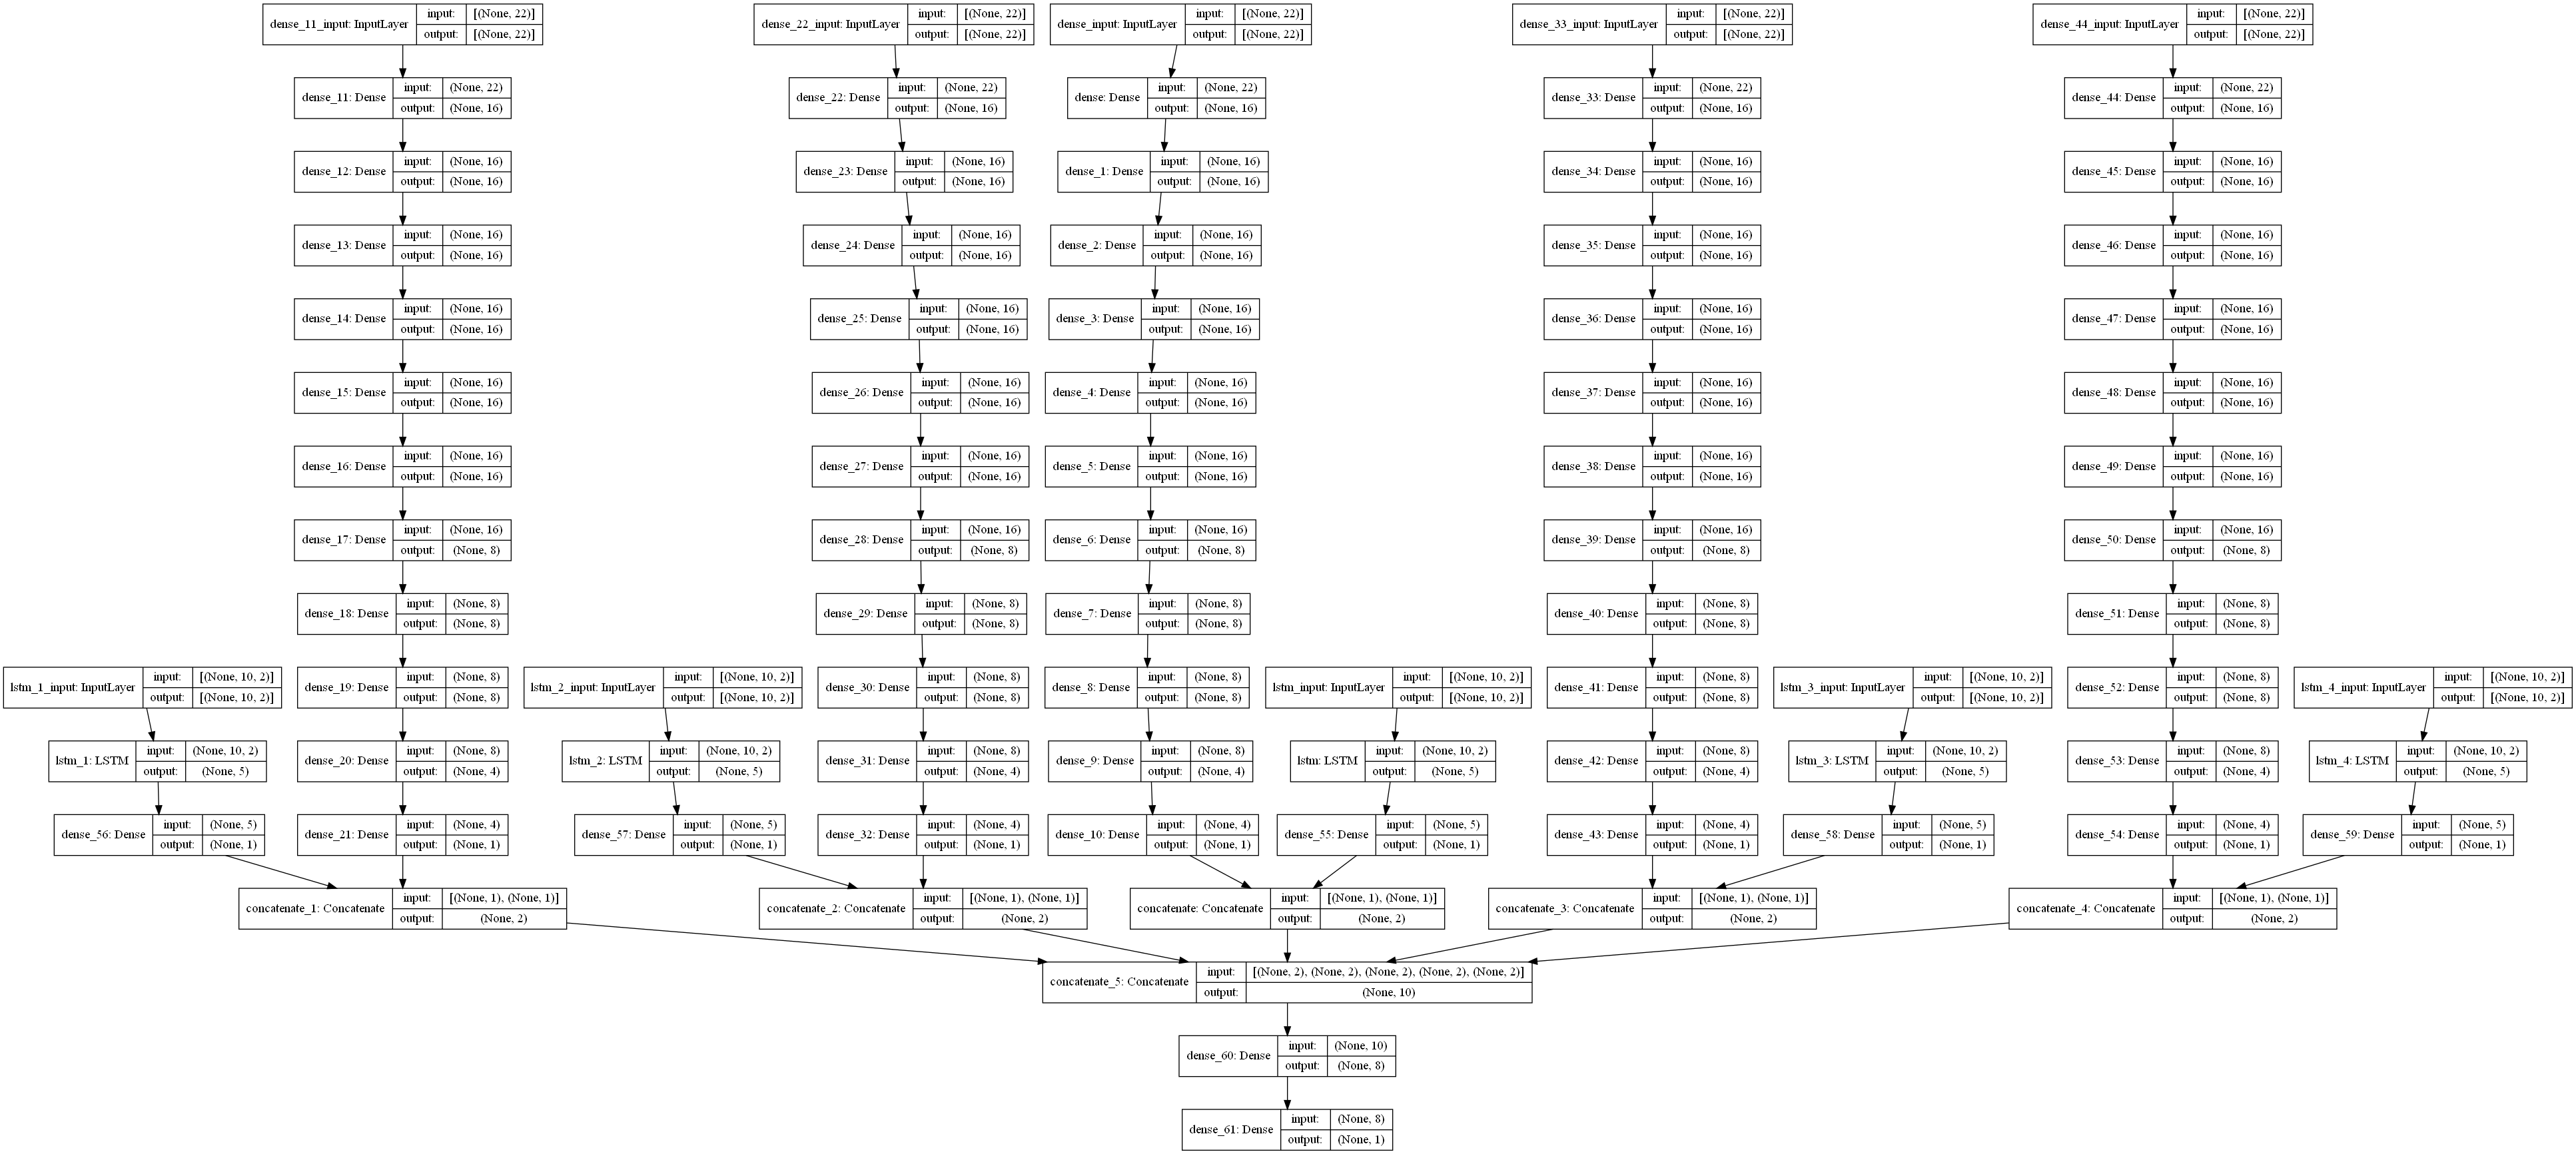

In [ ]:
from keras.utils.vis_utils import plot_model
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/'

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
y_train_dnn

0         1.31
1         1.31
2         1.31
3         1.31
4         1.31
          ... 
589947    2.24
589948    2.24
589949    2.24
589950    2.24
589951    2.24
Name: 22, Length: 589952, dtype: float64

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

opt = Adam(learning_rate=1e-3, decay=1e-3 / 200)
model.compile(optimizer='adam',loss='mape')

early_stopping = EarlyStopping(patience=20)

with tf.device('/GPU:0'):  
    history=model.fit(x=[X_train_dnn,X_train_LSTM,X_train_dnn,X_train_LSTM,X_train_dnn,X_train_LSTM,X_train_dnn,X_train_LSTM,X_train_dnn,X_train_LSTM], y=np.array(y_train_dnn), validation_data=([X_valid_dnn,X_valid_LSTM,X_valid_dnn,X_valid_LSTM,X_valid_dnn,X_valid_LSTM,X_valid_dnn,X_valid_LSTM,X_valid_dnn,X_valid_LSTM], np.array(y_valid_dnn)),
    epochs=100, batch_size=5, callbacks=[early_stopping],verbose=1)
# with tf.device('/GPU:0'):
#     history=model.fit(x=[X_train_dnn,X_train_LSTM], y=np.array(y_train_dnn), validation_data=([X_valid_dnn,X_valid_LSTM], np.array(y_valid_dnn)),epochs=50, batch_size=100, callbacks=[early_stopping],verbose=1)

Epoch 1/100
117991/117991 [==============================] - 4617s 39ms/step - loss: 1.5860 - val_loss: 0.7738
Epoch 2/100
117991/117991 [==============================] - 5177s 44ms/step - loss: 0.6561 - val_loss: 0.7454
Epoch 3/100
117991/117991 [==============================] - 5095s 43ms/step - loss: 0.5909 - val_loss: 0.7879
Epoch 4/100
117991/117991 [==============================] - 4629s 39ms/step - loss: 0.5430 - val_loss: 0.2617
Epoch 5/100
  5059/117991 [>.............................] - ETA: 1:08:22 - loss: 0.4923

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

# acc_ax.plot(history.history['acc'], 'b', label='train acc')
# acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
# acc_ax.set_ylabel('accuracy')
# acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
preds_test = model.predict([X_test_dnn,X_test_LSTM])


In [ ]:
result_df_test=pd.DataFrame(preds_test)
result_df_test['True']=y_test_dnn
result_df_test

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error


MAE = round(mean_absolute_error(preds_test,y_test_dnn),3)
MSE = round(mean_squared_error(preds_test,y_test_dnn),3)
RMSE = round(mean_squared_error(preds_test,y_test_dnn),3)
MAPE = round(mean_absolute_percentage_error(preds_test,y_test_dnn),3)
print(MAE, MSE, RMSE,MAPE)